# YOUR NAME HERE: Rhami Thrower

# A5 Convolutional Neural Network (Total 150pts)


## 1. Import libraries (Total 6pts)

### 1.1 Import torch, torchvision, torchvision.transforms, torch.utils.data and torch.nn (6pts)

In [ ]:
# TODO
import torch
import torchvision
from torchvision import transforms
import torch.utils.data
import torch.nn as nn

## 2. Data Preparation (Total 32pts)


### 2.1 Image Transformation (12pts)
Define a transformation pipeline using torchvision.transforms.Compose.

In the pipeline, use **ColorJitter, GaussianBlur, RandomHorizontalFlip, ToTensor and Normalize** from the transforms library.

For the first four transformations, use suitable parameters of your informed choice. At the end, normalize the images with mean 0.5 and variance 0.5.

Read about these transformations here: https://pytorch.org/vision/0.9/transforms.html

In [ ]:
# TODO
pipeline = transforms.Compose([ transforms.ColorJitter(brightness = 0.1,contrast = 0.1, saturation = 0.1, hue = 0.1),
                               transforms.GaussianBlur(kernel_size = 3, sigma = (0.1,0.2)),
                               transforms.RandomHorizontalFlip(p = 0.5),
                               transforms.ToTensor(),
                               transforms.Normalize(mean = (0.5,0.5,0.5),std = (0.5,0.5,0.5))])

### 2.2 Prepare train and test set by loading CIFAR10 dataset from torchvision.datasets. (4pts)
Make sure you are using the **transform** pipeline (you just wrote in task #2.1) on both train and test set.

**Hint:** Preparing train and test sets can be directly achieved by utilizing the class parameters.


Read about CIFAR10 dataset class in PyTorch: https://pytorch.org/vision/0.9/datasets.html#cifar

In [ ]:
# TODO
train_data = torchvision.datasets.CIFAR10('/content/drive/MyDrive/Colab Notebooks',train = True, transform = pipeline , download = True)
test_data = torchvision.datasets.CIFAR10('/content/drive/MyDrive/Colab Notebooks', transform = pipeline, download = True)

100%|██████████| 170498071/170498071 [00:01<00:00, 95568283.53it/s] 


Extracting /content/drive/MyDrive/Colab Notebooks/cifar-10-python.tar.gz to /content/drive/MyDrive/Colab Notebooks
Files already downloaded and verified


### 2.3 Use torch.utils.data.random_split() to make a validation set from the training set with 80:20 split. (3pts)

Make sure the training set you'll use after this point excludes the validation set of images


In [ ]:
# TODO
test_size = int(len(train_data) * .2)
train_set, validation_set = torch.utils.data.random_split(train_data, [len(train_data) - test_size, test_size])

### 2.4 Prepare three dataloaders for train, validation and test set. Use an appropriate batchsize of your choice. (1+2+2+2 =7pts)


**Hints:**
1. Remember that choosing a batchsize is always a trade-off between efficiency and generalizability. With large batchsize, your model learns more and better in each forward pass, but each pass will require larger computation. On the other hand, with small batchsize, it might converge quicker, but each forward pass teaches features from a smaller subset, which may not be a good representation of the overall data; leading to jittery convergence.
2. During training, you will use the train and validation set for tracking the loss and avoiding overfitting. The test set will be hold out until you are ready to evaluate a trained model on new data.

Read about pytorch Dataloaders here:
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#preparing-your-data-for-training-with-dataloaders

In [ ]:
# TODO: set a batch size
batchSize = 32

# TODO: write dataloader for train set
train_loader =  torch.utils.data.DataLoader(train_set, batch_size=batchSize, shuffle = True)

# TODO: write dataloader for test set
test_loader =  torch.utils.data.DataLoader(test_data, batch_size=batchSize, shuffle = True)

# TODO: write dataloader for validation set
valid_loader = torch.utils.data.DataLoader(validation_set, batch_size = batchSize, shuffle = True)


### 2.5 Load a random batch of images from the training set using the trainloader. Then use *make_grid()*  from *torchvision.utils* and *imshow()* from *matplotlib.pyplot* to show the images. Also, print the corresponding true labels for those image samples. (6pts)
Hint: you may need to reshape the *make_grid()* output to comply with the format *imshow()* accepts.

torch.Size([32, 3, 32, 32])
bird ,  airplane ,  automobile ,  ship ,  ship ,  ship ,  truck ,  frog ,  frog ,  deer ,  
deer ,  bird ,  horse ,  truck ,  automobile ,  dog ,  deer ,  airplane ,  bird ,  dog ,  
horse ,  ship ,  automobile ,  airplane ,  horse ,  automobile ,  automobile ,  frog ,  frog ,  truck ,  
deer ,  frog ,  

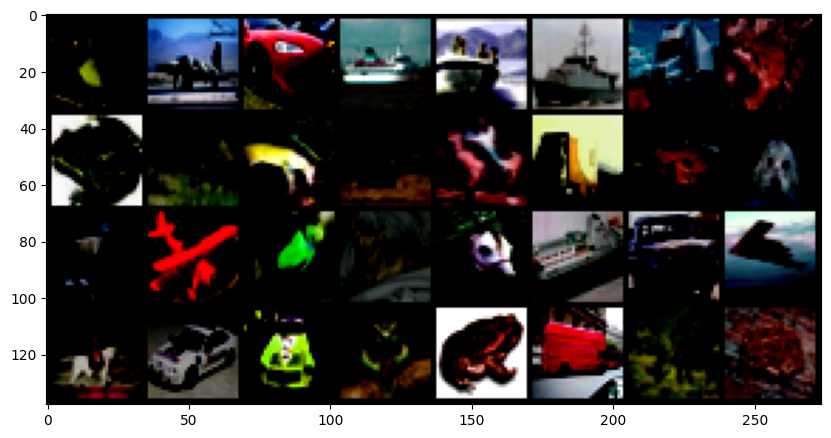

In [ ]:
# TODO: load a random batch of test set images
import matplotlib.pyplot as plt
import numpy as np

print_nl = 0
image, labels = next(iter(train_loader))
print(image.shape)
# TODO: show the images
string_labels = train_data.classes
print_image = np.transpose(torchvision.utils.make_grid(image), (1,2,0))
fig,ax = plt.subplots(figsize = (10,10))
ax.imshow(print_image)
fig.show()
# TODO: print the ground truth class labels for these images
for label in labels:
  if print_nl == 10:
    print()
    print_nl = 0
  print(string_labels[label], ", ", end = " ")
  print_nl = print_nl + 1


## 3. Model Design (Total 22pts)

### 3.1 Define a neural network model: (2+7+7 =16pts)
- Name the model class with your first name
- In the following sequential order, the model should consist:

    (1) a 2D convolution layer with 6 filters, dimension of each filter is (5, 5), stride=1, no zero padding
    
    (2) a Max Pool layer with filter size (2, 2), stride=2
    
    (3) a 2D convolution layer with 16 filters, dimension of each filter is (5, 5), stride=1, no zero padding

    (4) a 2D Max Pool layer with filter size (2, 2), stride=2
    
    ~ a flatten layer ~

    (5) a Dense/Fully-connected layer with 120 neurons
    
    ~ a ReLU activation ~
    
    ~ a Dropout Layer ~

    (6) a Dense/Fully-connected layer with 80 neurons
    
    ~ a ReLU activation ~

    (7) a Dense/Fully-connected layer with 10 neurons

Note:
1. Flatten, ReLU and Dropout are not really "layers". They are operations with specific purpose. But in model construction in pytorch, they are abstracted as layers.
    
    Flatten is used to convert the 4th layer output to a 1D tensor so that it can be passed through the next fully-connected layer. Since each forward pass takes a batch of data, use the *start_dim* parameter of *torch.flatten()* appropriately to keep the batch dimension intact.
    
    ReLU is an activation that transforms the Dense Layer's linear output to a non-linear "active" output.
    
    Dropout is a regularization technique. Read more in slides. In this assignment, you can drop neurons with 50% probability.

2. This dataset has 10 classes, hence the final layer consists 10 neurons.

3. The model architecture is similar to the one you saw in in-class Quiz 2, with an extra dense layer in the end.

    Read about building your custom model in pytorch here: https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html

    The official pytorch documentation on conv, flatten, rely, dense are also resourceful.


In [ ]:
class YourName(nn.Module):
    """ what datacamps can help here """
    # nn.linear() pytorch module for example
    def __init__(self):
        super(YourName, self).__init__()
        # TODO: Initialize the layers
        self.conv1 = nn.Conv2d(3, 6,(5,5), stride = 1,padding = 0)
        self.maxpool1 = nn.MaxPool2d((2,2),stride = 2)
        self.conv2  = nn.Conv2d(6, 16,(5,5), stride = 1,padding = 0)
        self.maxpool2 = nn.MaxPool2d((2,2),stride = 2)
        self.flatten = torch.nn.Flatten()
        self.linear1 = torch.nn.Linear(16*5*5,128)
        self.relu = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(p = 0.5)
        self.linear2 = torch.nn.Linear(128,80)
        self.linear3 = torch.nn.Linear(80, 10)


        """ what is the flatten layer dropout layer relu activations and dense fully connected layer and how do you do them"""
    def forward(self, x):
        # TODO: Define the dataflow through the layers
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        return x


### 3.2 Create an instance of the model class that you just prepared. (2pts)

In [ ]:
# TODO:
machine = YourName()

### 3.3 Set up Cross Entropy Loss as the loss function and *Adam* as the optimizer. Use a learning rate of your choice for the optimizer. (4pts)


In [ ]:
# TODO: Define the loss function and optimizer
""" week 11 and week 12 pytorch given nn.crossEntropy"""
lrate = 0.0008
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(machine.parameters(), lr = lrate)

## 4. Training and Validation (Total 50pts)


### 4.1 Write a training loop to load data, compute model output, compute loss and backpropagating it to update model parameters. (30pts)

The # TODO tags below contain further instructions.

In [ ]:
from torch.nn.parallel.data_parallel import data_parallel
from google.colab import drive
drive.mount('/content/drive')

ValueError: ignored

In [ ]:

# TODO: Define number of epochs
epochs = 60
# TODO: Initialize empty lists to store training loss, training accuracy, validation loss, validation accuracy
# You will use these lists to plot the loss history.
temp_loss = []
temp_accuracy = []
training_loss = []
training_accuracy = []
validation_loss = []
validation_accuracy = []

# TODO: Loop through the number of epochs
""" is it normal for this to take upwards to 2 hours """
for i in range(0, epochs):
    # TODO: set model to train mode
    machine.train()
    # TODO: iterate over the training data in batches
    for j,data in enumerate(train_loader, 0):

        # TODO: get the image inputs and labels from current batch
        image,labels = data

        # TODO: set the optimizer gradients to zero to avoid accumulation of gradients
        optimizer.zero_grad()

        # TODO: compute the output of the model
        output = machine(image)

        # TODO: compute the loss on current batch
        Loss = loss(output, labels)

        # TODO: backpropagate the loss
        Loss.backward()

        # TODO: update the optimizer parameters
        optimizer.step()

        # TODO: update the train loss and accuracy
        temp_loss.append(int(Loss.item()))
        _, predict = torch.max(output, 1)
        correct = torch.eq(predict, labels).sum().item()
        temp_accuracy.append((correct/len(labels)))

    # TODO: compute the average training loss and accuracy and store in respective arrays
    avg_loss = np.mean(temp_loss)
    avg_accuracy = np.mean(temp_accuracy)
    training_loss.append(avg_loss)
    training_accuracy.append(avg_accuracy)
    temp_loss.clear()
    temp_accuracy.clear()
    # TODO: set the model to evaluation mode
    machine.eval()
    # TODO: keeping the gradient computation turned off, loop over batches of data from validation set.
    for k,data in enumerate(valid_loader, 0):
            # TODO: compute output of the model
            image, labels = data
            output = machine(image)

            # TODO: compute the loss
            Loss = loss(output, labels)

            # TODO: compute the validation loss and accuracy
            temp_loss.append(int(Loss.item()))
            _, predict = torch.max(output, 1)
            correct = torch.eq(predict, labels).sum().item()
            temp_accuracy.append((correct/len(labels)))

    # TODO: compute the average validation loss and accuracy and store in respective lists
    avg_loss = (np.sum(temp_loss)) / (len(temp_loss))
    avg_accuracy = (np.sum(temp_accuracy)) / (len(temp_accuracy))
    validation_loss.append(avg_loss)
    validation_accuracy.append(avg_accuracy)
    temp_loss.clear()
    temp_accuracy.clear()
    # TODO: print the training loss, training accuracy, validation loss and validation accuracy at the end of each epoch
    print("training: \n  loss:\t", training_loss, "\n  accuracy:\t",training_accuracy, end = "\n")
    print("validation: \n  loss:\t", validation_loss, "\n  accuracy:\t",validation_accuracy)
    # TODO: save the model parameters once in every 5 epochs
    if i % 5 == 0: # should it be 5 or 4
      torch.save(machine.state_dict(), '/content/drive/MyDrive/Colab Notebooks/model_parameters_epoch_{}.pth'.format(i))



training: 
  loss:	 [1.1688] 
  accuracy:	 [0.357075]
validation: 
  loss:	 [1.0031948881789137] 
  accuracy:	 [0.455870607028754]
training: 
  loss:	 [1.1688, 1.0056] 
  accuracy:	 [0.357075, 0.45265]
validation: 
  loss:	 [1.0031948881789137, 0.9904153354632588] 
  accuracy:	 [0.455870607028754, 0.49790335463258784]
training: 
  loss:	 [1.1688, 1.0056, 0.9968] 
  accuracy:	 [0.357075, 0.45265, 0.494575]
validation: 
  loss:	 [1.0031948881789137, 0.9904153354632588, 0.9808306709265175] 
  accuracy:	 [0.455870607028754, 0.49790335463258784, 0.5335463258785943]
training: 
  loss:	 [1.1688, 1.0056, 0.9968, 0.9824] 
  accuracy:	 [0.357075, 0.45265, 0.494575, 0.5167]
validation: 
  loss:	 [1.0031948881789137, 0.9904153354632588, 0.9808306709265175, 0.9488817891373802] 
  accuracy:	 [0.455870607028754, 0.49790335463258784, 0.5335463258785943, 0.544029552715655]
training: 
  loss:	 [1.1688, 1.0056, 0.9968, 0.9824, 0.9432] 
  accuracy:	 [0.357075, 0.45265, 0.494575, 0.5167, 0.5337]
validation

### 4.2 Plot and compare (5+5 =10pts)
1. training and validation loss over the number of epochs
2. training and validation accuracy over the number of epochs

(Hint: Use plot() from *matplotlib.pyplot*, import it if you haven't already done so.)

In [ ]:
import matplotlib.pyplot as plt

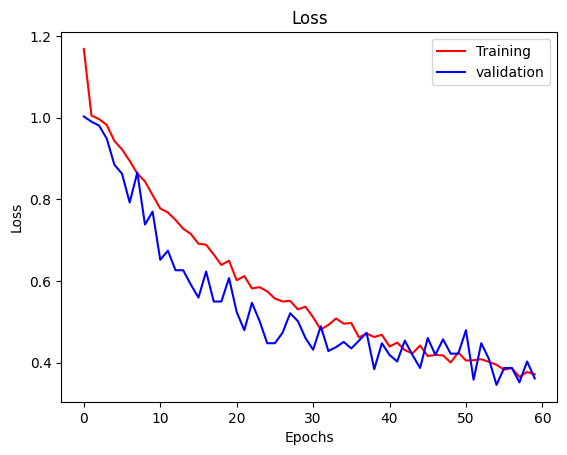

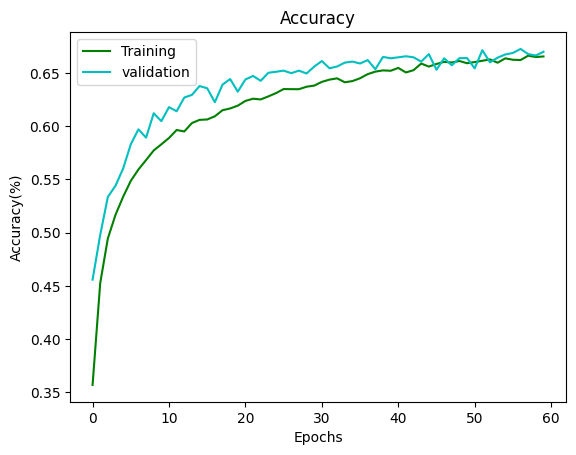

In [ ]:
# TODO: plot the training and validation loss
plt.plot(range(0, epochs), training_loss, color = 'r')
plt.plot(range(0, epochs), validation_loss, color = 'b')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training", "validation"])
plt.show()
# TODO: plot the training and validation accuracy
plt.plot(range(0, epochs), training_accuracy, color = 'g')
plt.plot(range(0, epochs), validation_accuracy, color = 'c')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy(%)")
plt.legend(["Training", "validation"])
plt.show()


### 4.3 Discussion: (2*5 = 10pts)
(1) Does the training loss and accuracy improve as number of epoch increases?

(2) Does the validation loss and accuracy improve as number of epoch increases?

(3) Are there any sign of overfitting in the results? If so, when did it start to occur?

(4) How many epochs did it take for the model to converge to a good solution?

(5) What enhancement can be tried to the architecture to further improve the validation performance?

~ # TODO
1) yes both the accuracy and loss improve over each epochs going from about a 30-40% accuracy to a 67-68% accuracy, and the loss goes from about a 99% loss to about a 30-40% loss
2) yes the both improve in a similar fashion to Part 1
3) their are no signs of over fitting if their where any signs the accuracy would have had a large difference in accuracy
4) For the given hyperparameters it took about 60 epochs to get a good accuracy
5) I think just more fine tuning on the hyperparameters such as changing batch size, epochs, and learning rate can help get a better confergence.

## 5. Testing on new data (Total 40pts)


### 5.1 Load the best performing model (one with good validation accuracy and without overfitting) among the ones you saved. (4pts)

In [ ]:
"""is this same as steps 3 and 4 """
# TODO: instantiate a model
bot = YourName()

# TODO: load parameters from one of the saved model states
best_params = None
best_acc = -1
i = 0
for acc in validation_accuracy:
  if i % 5 == 0:
    if acc > best_acc:
      best_acc = acc
      best_params = torch.load('/content/drive/MyDrive/Colab Notebooks/model_parameters_epoch_{}.pth'.format(i))
  i = i + 1
bot.load_state_dict(best_params)
# TODO: set this model to evaluation mode
bot.eval()

YourName(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=400, out_features=128, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (linear2): Linear(in_features=128, out_features=80, bias=True)
  (linear3): Linear(in_features=80, out_features=10, bias=True)
)

### 5.2 Take a random batch of images from test set and show the images. Print the corresponding ground truth class labels. Then compute model output (model selected at previous step) and the predicted labels for the images in this batch. (10pts)

This is similar to task #2.5 with additional task on computing model output and printing predicted labels.

torch.Size([32, 3, 32, 32])
deer, ship, dog, airplane, horse, truck, automobile, cat, airplane, bird, 
ship, deer, ship, bird, frog, frog, dog, cat, truck, deer, 
automobile, ship, dog, deer, truck, deer, dog, ship, frog, automobile, 
frog, frog, 
deer, ship, dog, airplane, horse, truck, automobile, frog, 
ship, bird, ship, deer, ship, bird, frog, frog, truck, deer, 
truck, deer, automobile, ship, horse, deer, truck, bird, cat, ship, 
frog, automobile, frog, frog, 

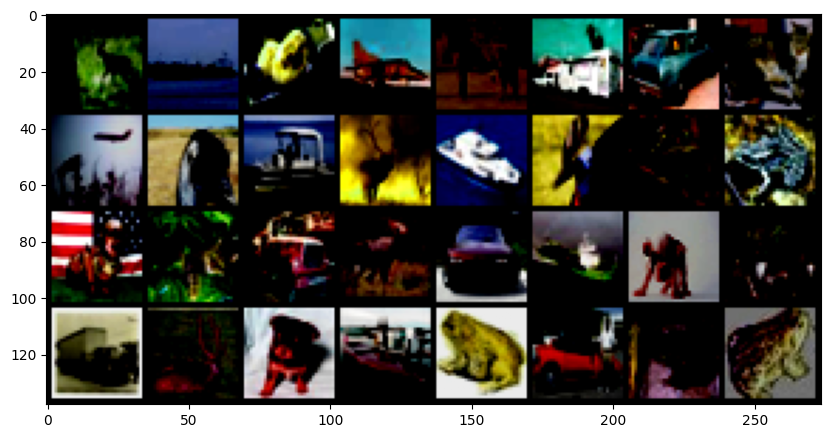

In [ ]:
# TODO: load a random batch of test set images
print_nl = 0
image, labels = next(iter(test_loader))
print(image.shape)
# TODO: show the images
string_labels = test_data.classes
print_image = np.transpose(torchvision.utils.make_grid(image), (1,2,0))
fig,ax = plt.subplots(figsize = (10,10))
ax.imshow(print_image)
fig.show()
# TODO: print the ground truth class labels for these images
for label in labels:
  if print_nl == 10:
    print()
    print_nl = 0
  print(string_labels[label], end = ", ")
  print_nl = print_nl + 1

# TODO: compute model output
output = bot(image)
print()
# TODO: print the predicted class labels for these images
for prediction in output:
  _, predict = torch.max(prediction, -1)
  if print_nl == 10:
    print()
    print_nl = 0
  print(string_labels[int(predict.item())],end = ", ")
  print_nl = print_nl + 1

### 5.3 Compute the average accuracy on test data using this model. (4+2 =6pts)
Loop over the test set, compute accuracy on each batch, lastly print the average accuracy.

In [ ]:
# TODO: compute accuracy on each batch of test set
accuracy = []
for i,data in enumerate(test_loader, 0):
            # TODO: compute output of the model
            image, labels = data
            output = bot(image)

            # TODO: compute the validation loss and accuracy
            _, predict = torch.max(output, 1)
            correct = torch.eq(predict, labels).sum().item()
            accuracy.append((correct/len(labels)))

# TODO: print the average accuracy
print((np.sum(accuracy)) / (len(accuracy)))

0.7181901791426744


### 5.4 Compute the average accuracy for each individual class. (8+4 =12pts)
Hint: similar to #5.3. During each loop, log the accuracy for each class separately (a python/numpy dictionary can help). Then print the individual accuracy for the 10 output classes.

In [ ]:
# TODO: compute per-class accuracy on each batch of test set
accuracy_ten_output = []
acc10 = 0
i = 0
for acc in accuracy:
  print(acc, end = ", ")
  acc10 = acc10 + acc
  if i % 10 == 0:
    accuracy_ten_output.append((acc10/10))
    acc10 = 0
  i = i + 1


i = 0
print('\n\naccuracy for 10 output:')
# TODO: print per-class accuracy for 10 output classes
for acc in accuracy_ten_output:
  print(acc,end = ', ')
  i = i +1

0.78125, 0.71875, 0.65625, 0.625, 0.8125, 0.6875, 0.71875, 0.65625, 0.59375, 0.71875, 0.625, 0.78125, 0.625, 0.6875, 0.84375, 0.8125, 0.75, 0.71875, 0.78125, 0.75, 0.65625, 0.78125, 0.71875, 0.75, 0.71875, 0.71875, 0.75, 0.75, 0.84375, 0.6875, 0.6875, 0.625, 0.625, 0.71875, 0.6875, 0.6875, 0.59375, 0.625, 0.8125, 0.71875, 0.65625, 0.53125, 0.78125, 0.65625, 0.71875, 0.6875, 0.875, 0.65625, 0.5625, 0.78125, 0.625, 0.6875, 0.71875, 0.6875, 0.78125, 0.75, 0.59375, 0.5, 0.75, 0.75, 0.875, 0.75, 0.75, 0.71875, 0.78125, 0.71875, 0.65625, 0.625, 0.75, 0.6875, 0.71875, 0.71875, 0.65625, 0.75, 0.6875, 0.625, 0.625, 0.8125, 0.71875, 0.71875, 0.53125, 0.71875, 0.65625, 0.53125, 0.75, 0.6875, 0.78125, 0.75, 0.75, 0.78125, 0.71875, 0.75, 0.8125, 0.71875, 0.75, 0.78125, 0.8125, 0.59375, 0.65625, 0.71875, 0.71875, 0.8125, 0.8125, 0.78125, 0.59375, 0.78125, 0.78125, 0.8125, 0.6875, 0.65625, 0.75, 0.8125, 0.6875, 0.78125, 0.59375, 0.65625, 0.78125, 0.75, 0.75, 0.75, 0.75, 0.59375, 0.8125, 0.6875, 0.75,

### 5.5 Discussion: (2+2+4 =8pts)
1. Which class of images were detected with highest accuracy?
2. Which class of images were hardest for the model to detect?
3. Explain 1-2 possible reasons why detection of some class can be harder for the same model.



~ # TODO
1) It seems airplains and birds seemed to be classified correctly the most.
2) the model that was hardest to classify would either be between automobile or deer.
3) this could be because the features of thoose models may be similar take for instance deer and cat which was the most mistaken one in the model, both have fur, ears,walks on four legs, and have similar colors. Another aspect that could cause this is the quality of the image, take for instance you have a dog and a cat that a fairly distinct without noise the model could probably predict these with a high accuracy, however when noise is applied to these images (such as static) the model can start to confuse them because the features that made them distinct from one another starts to loose its uniqueness.